# <div style="text-align: center; background-color:black; font-family:Georgia, serif; color: red; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Heart Disease Analysis 🫀</div>

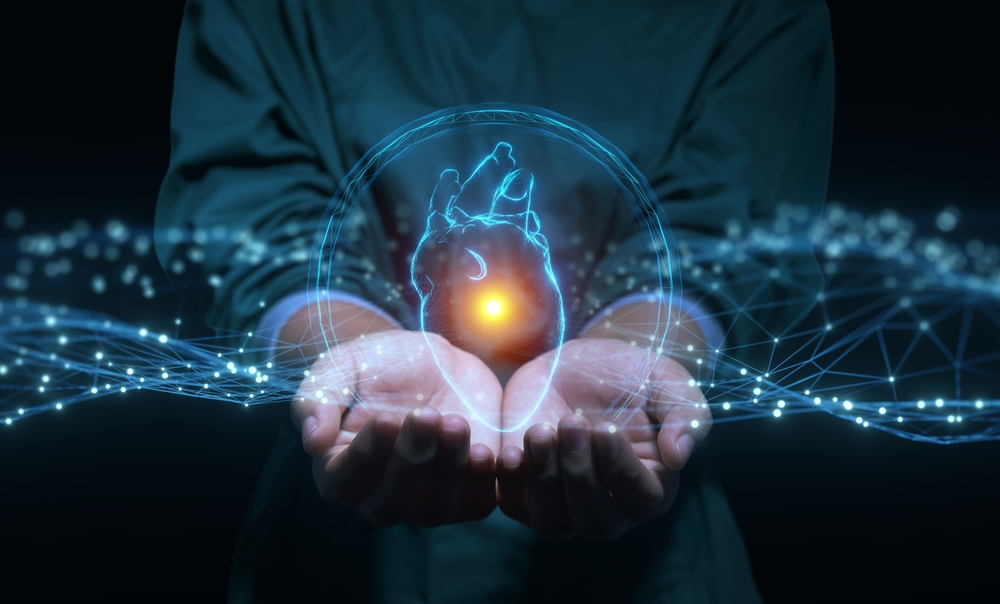

# Overview
> In this notebook, we aim to address two main tasks using a dataset related to heart disease:
> 
        > Prediction Task: Predict whether a patient has heart disease based on the given attributes.
        > Exploratory Data Analysis (EDA) Task: Perform exploratory analysis to gain insights that could aid in understanding the problem better.

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [2]:
# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/heart-disease-dataset/heart_disease_uci.csv
/kaggle/input/heart-disease-dataset/heart_disease_cleaned.csv


# Load Data

In [3]:
data=pd.read_csv('/kaggle/input/heart-disease-dataset/heart_disease_uci.csv')
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


## About Data 

> Column Descriptions:
> 
        > id (Unique id for each patient)
        > age (Age of the patient in years)
        > origin (place of study)
        > sex (Male/Female)
        > cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
        > trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
        > chol (serum cholesterol in mg/dl)
        > fbs (if fasting blood sugar > 120 mg/dl)
        > restecg (resting electrocardiographic results)Values: [normal, stt abnormality, lv hypertrophy]
        > thalach: maximum heart rate achieved
        > exang: exercise-induced angina (True/ False)
        > oldpeak: ST depression induced by exercise relative to rest
        > lope: the slope of the peak exercise ST segment
        > ca: number of major vessels (0-3) colored by fluoroscopy
        > thal: [normal; fixed defect; reversible defect]
        > num: the predicted attribute

# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# Handling Missing Values in the Dataset
>Total Missing Values: The dataset contains missing values in several columns. It's crucial to address these missing values before proceeding with analysis or modeling.
   ## Missing Values Count by Feature:
        trestbps (Resting Blood Pressure): 59 missing values.
        chol (Serum Cholesterol): 30 missing values.
        fbs (Fasting Blood Sugar): 90 missing values.
        restecg (Resting Electrocardiographic Results): 2 missing values.
        thalch (Maximum Heart Rate Achieved): 55 missing values.
        exang (Exercise Induced Angina): 55 missing values.
        oldpeak (ST Depression Induced by Exercise Relative to Rest): 62 missing values.
        slope (Slope of the Peak Exercise ST Segment): 309 missing values.
        ca (Number of Major Vessels Colored by Fluoroscopy): 611 missing values.
        thal (Thalassemia): 486 missing values.
> Impact of Missing Values: Missing values can affect the analysis and modeling process by introducing bias and reducing the effectiveness of predictive models. It's important to handle them appropriately to avoid misleading results.

## Handling Strategies:
> Imputation: One approach is to impute missing values using statistical measures such as mean, median, or mode of the respective feature.

> Dropping: Another approach is to drop rows or columns with a high percentage of missing values if they are not critical for analysis or modeling.

> Domain-specific Imputation: For some features, domain-specific knowledge or expert opinion may be used to impute missing values.

In [6]:
# Select columns with non-numeric data types
categorical_columns = data.select_dtypes(include=['object'])

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_columns.columns.tolist())


Categorical Columns:
['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [7]:
# Select columns with numeric data types
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Print the list of numeric columns
print("Numeric Columns:")
print(numeric_columns.columns.tolist())



Numeric Columns:
['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [8]:
# Impute missing values with mode for each categorical feature
for col in categorical_columns:
    mode_value = data[col].mode()[0]  # Calculate the mode value for the current column
    data[col].fillna(mode_value, inplace=True) 

In [9]:
# Impute missing values with mode for each categorical feature
for col in numeric_columns:
    mean_value = data[col].mean()  # Calculate the mode value for the current column
    data[col].fillna(mean_value, inplace=True) 

In [10]:
data.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

# Checking Duplicate Values

In [11]:
duplicat=data[data.duplicated()]

In [12]:
duplicat

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


* No Duplicate values

> # Why should we check duplicate values in data?

         checking for duplicate values is a critical data cleaning step that ensures the reliability, accuracy, and consistency of your dataset, leading to more robust analysis and decision-making.

# Checking Outlier

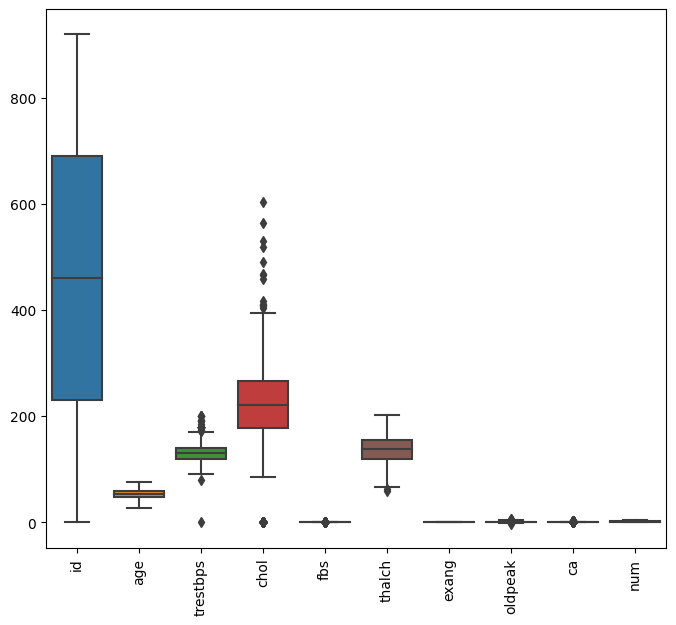

In [13]:
# Create a box plot for numerical columns
plt.figure(figsize=(8,7))
sns.boxplot(data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

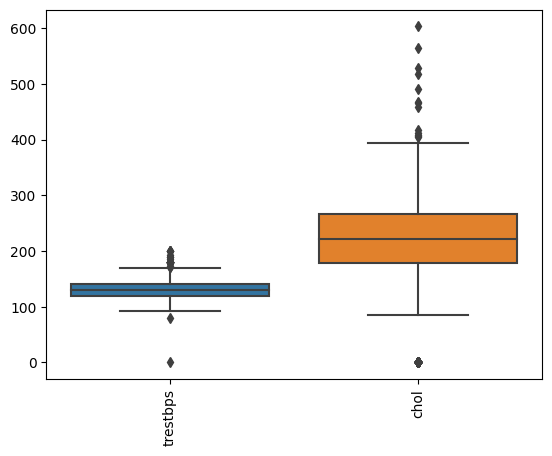

In [14]:
# Create a box plot for specific numerical columns
selected_columns = ['trestbps', 'chol']  
sns.boxplot(data=data[selected_columns])
plt.xticks(rotation=90)  
plt.show()

# 

# Outlier Detection using Quartiles in 'trestbps'

In [15]:
# Calculate Q1 and Q3

Q1 = data['trestbps'].quantile(0.25)
Q3 = data['trestbps'].quantile(0.75)

In [16]:
# Calculate IQR
IQR = Q3 - Q1

In [17]:
IQR

20.0

In [18]:
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [19]:
# Identify outliers
outliers = data[(data['trestbps'] < lower_bound) | (data['trestbps'] > upper_bound)]

In [20]:
# Print the outliers
print("Outliers:")
outliers

Outliers:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
14,15,52,Male,Cleveland,non-anginal,172.0,199.000000,True,normal,162.0,False,0.5,upsloping,0.000000,reversable defect,0
83,84,68,Male,Cleveland,non-anginal,180.0,274.000000,True,lv hypertrophy,150.0,True,1.6,flat,0.000000,reversable defect,3
126,127,56,Female,Cleveland,asymptomatic,200.0,288.000000,True,lv hypertrophy,133.0,True,4.0,downsloping,2.000000,reversable defect,3
172,173,59,Female,Cleveland,asymptomatic,174.0,249.000000,False,normal,143.0,True,0.0,flat,0.000000,normal,1
183,184,59,Male,Cleveland,typical angina,178.0,270.000000,False,lv hypertrophy,145.0,False,4.2,downsloping,0.000000,reversable defect,0
188,189,54,Male,Cleveland,atypical angina,192.0,283.000000,False,lv hypertrophy,195.0,False,0.0,upsloping,1.000000,reversable defect,1
201,202,64,Female,Cleveland,asymptomatic,180.0,325.000000,False,normal,154.0,True,0.0,upsloping,0.000000,normal,0
213,214,66,Female,Cleveland,asymptomatic,178.0,228.000000,True,normal,165.0,True,1.0,flat,2.000000,reversable defect,3
231,232,55,Female,Cleveland,asymptomatic,180.0,327.000000,False,st-t abnormality,117.0,True,3.4,flat,0.000000,normal,2
338,339,39,Male,Hungary,atypical angina,190.0,241.000000,False,normal,106.0,False,0.0,flat,0.676375,normal,0


# Outlier Detection using Quartiles in 'chol' 

In [21]:
Q1=data['chol'].quantile(0.25)
Q3=data['chol'].quantile(0.75)

In [22]:
# Calculate IQR
IQR = Q3 - Q1

In [23]:
# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [24]:
# Identify outliers
outliers = data[(data['chol'] < lower_bound) | (data['chol'] > upper_bound)]

In [25]:
# Print the outliers
print("Outliers:")
outliers

Outliers:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
48,49,65,Female,Cleveland,non-anginal,140.000000,417.0,True,lv hypertrophy,157.000000,False,0.800000,upsloping,1.000000,normal,0
121,122,63,Female,Cleveland,asymptomatic,150.000000,407.0,False,lv hypertrophy,154.000000,False,4.000000,flat,3.000000,reversable defect,4
152,153,67,Female,Cleveland,non-anginal,115.000000,564.0,False,lv hypertrophy,160.000000,False,1.600000,flat,0.000000,reversable defect,0
181,182,56,Female,Cleveland,asymptomatic,134.000000,409.0,False,lv hypertrophy,150.000000,True,1.900000,flat,2.000000,reversable defect,2
373,374,44,Male,Hungary,asymptomatic,150.000000,412.0,False,normal,170.000000,False,0.000000,flat,0.676375,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.000000,0.0,False,normal,120.000000,False,0.500000,upsloping,0.676375,normal,1
819,820,63,Male,VA Long Beach,non-anginal,130.000000,0.0,True,st-t abnormality,160.000000,False,3.000000,flat,0.676375,normal,0
822,823,48,Male,VA Long Beach,non-anginal,102.000000,0.0,False,st-t abnormality,110.000000,True,1.000000,downsloping,0.676375,normal,1
839,840,56,Male,VA Long Beach,asymptomatic,132.132404,0.0,False,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,1


> # Why should we need to find outlier?

        finding outliers is essential for maintaining data integrity, ensuring accurate analysis, improving model performance, generating insights, validating assumptions, and supporting decision-making processes across different fields and applications.


> # Why should we consider different approaches to handle outliers when dealing with a dataset containing a large number of outliers and limited data?

    * When faced with a dataset containing a substantial number of outliers and limited data, it's imperative to consider various approaches for outlier handling due to several reasons.
    * Firstly, outliers can significantly impact the accuracy and reliability of statistical analysis and predictive models.  
    * In such cases, traditional statistical methods may be inadequate, and alternative approaches that are less sensitive to outliers, such as robust statistical measures or model-based techniques, become necessary. Moreover, the presence of a large number of outliers can obscure underlying patterns and trends in the data, making it challenging to derive meaningful insights. By carefully considering different outlier handling approaches, including data transformations, trimming, or Winsorization, it's possible to mitigate the adverse effects of outliers and obtain more accurate and reliable results from the analysis.
    * Additionally, consulting domain experts and conducting sensitivity analysis can provide valuable insights into the significance of outliers and guide the selection of appropriate outlier handling methods tailored to the specific characteristics of the dataset and the objectives of the analysis

# Data Exploratory Analysis

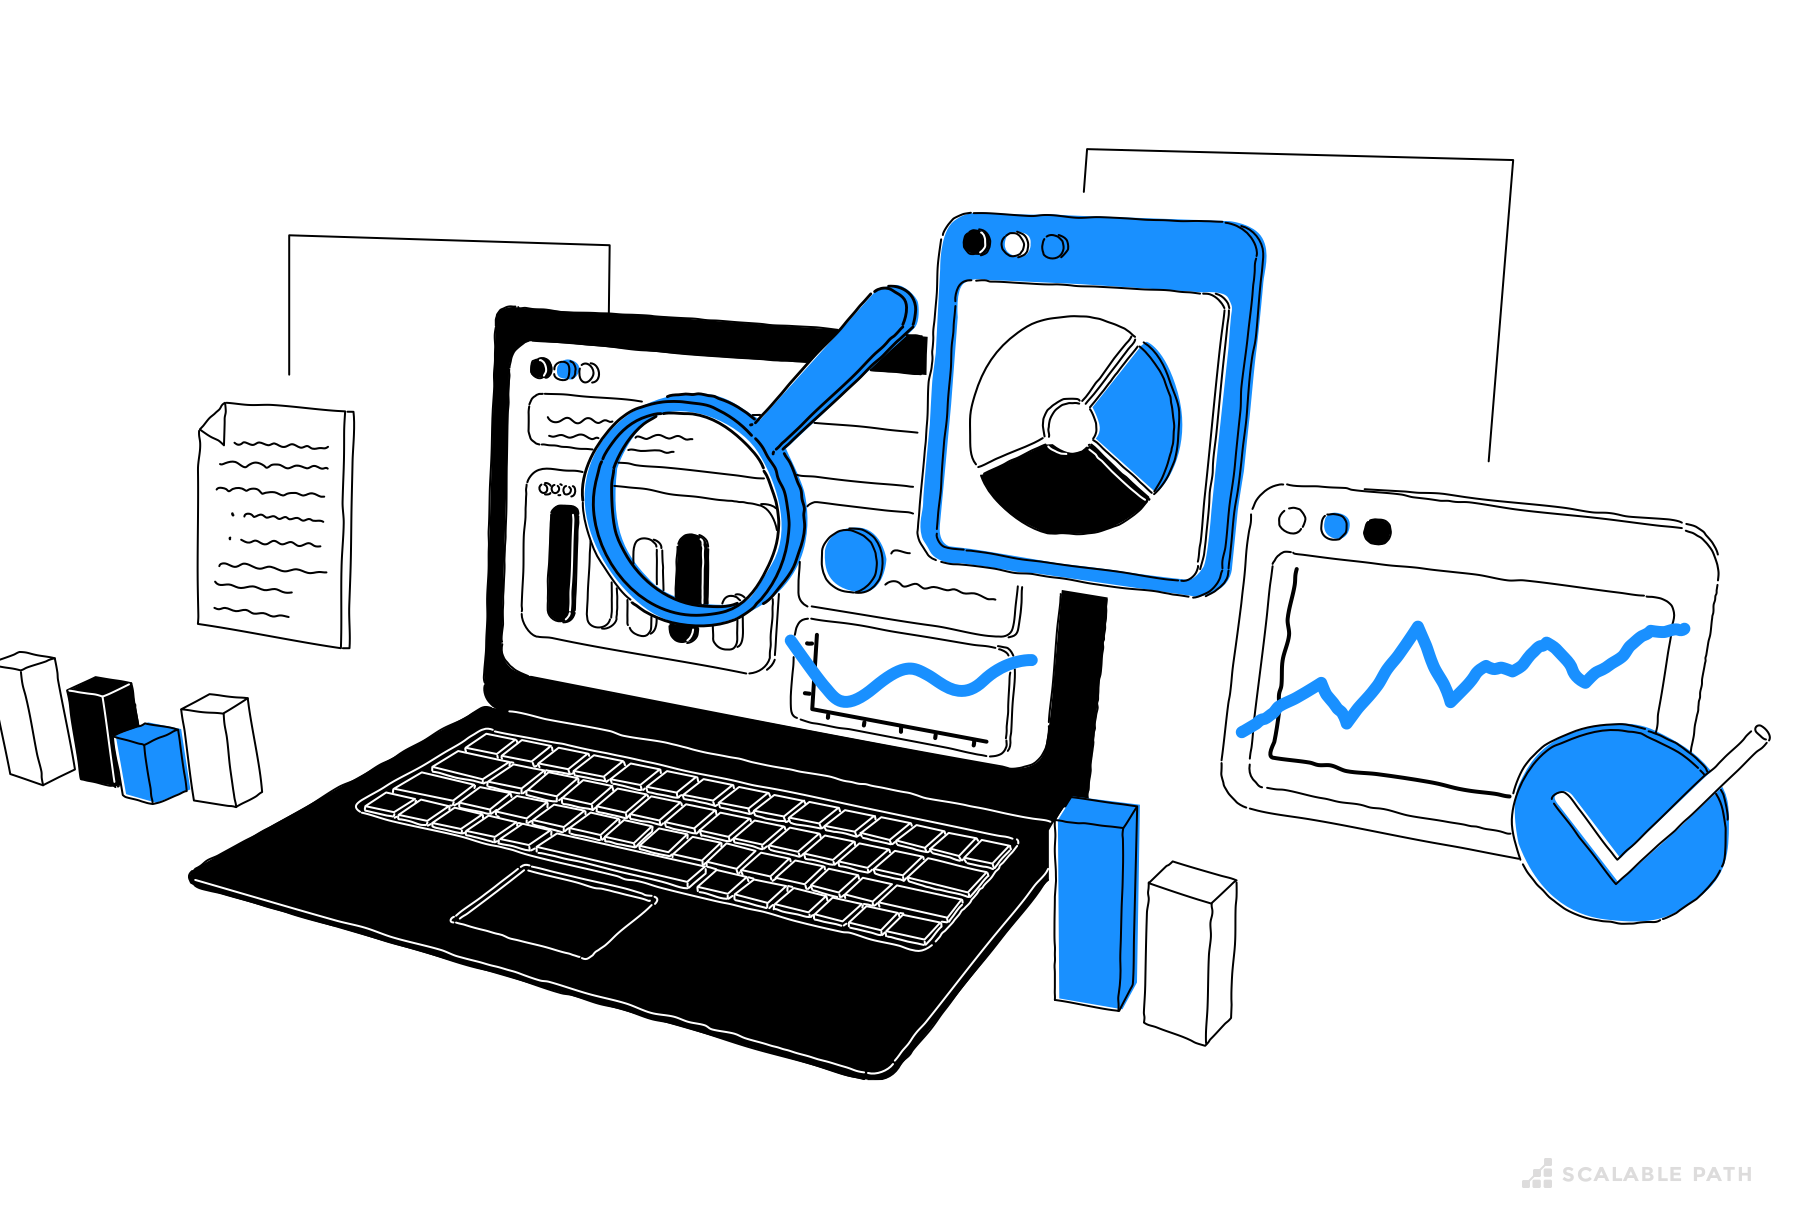

In [26]:
for i in data.columns:
    print(i,":",data[i].nunique())

id : 920
age : 50
sex : 2
dataset : 4
cp : 4
trestbps : 62
chol : 218
fbs : 2
restecg : 3
thalch : 120
exang : 2
oldpeak : 54
slope : 3
ca : 5
thal : 3
num : 5


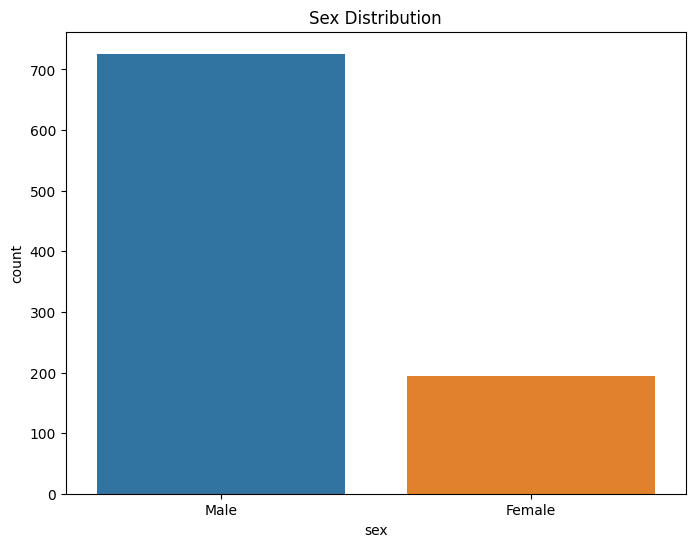

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',data=data)
plt.title('Sex Distribution')
plt.show()

* The dataset predominantly consists of male individuals, with their count exceeding 700.
* In contrast, the number of female individuals is notably lower, approximately around 200. This suggests a significant gender disparity within the dataset.

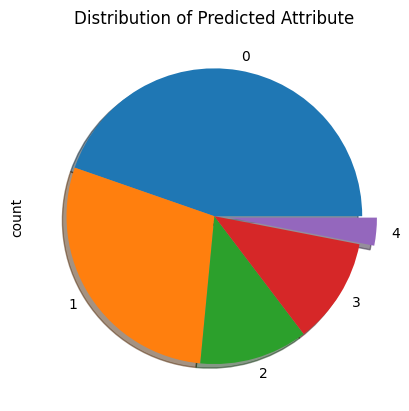

In [28]:
data['num'].value_counts().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True)
plt.title('Distribution of Predicted Attribute')
plt.show()

> possible interpretations for the values in the 'num' column:

1. 0: This value could represent one category or level of the predicted outcome. It might indicate the absence of a certain condition or event, depending on the context of the dataset.

2. 1, 2, 3: These values may represent increasing levels of severity, likelihood, or intensity of the predicted outcome. For example, in a medical context, they could signify different stages of a disease or health condition.

3. 4: This value might represent another category or level of the predicted outcome, distinct from values 0 through 3. It could indicate a severe condition, a different type of event, or a unique outcome category.

# Distribution of predicted outcomes across different regions

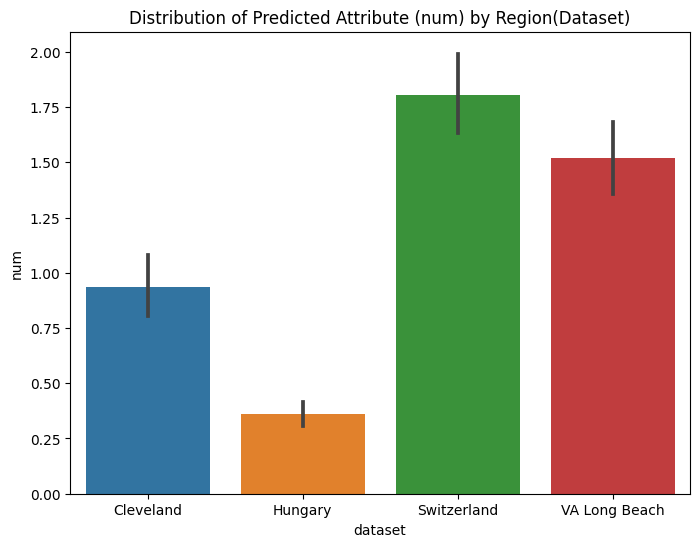

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='dataset',y='num',data=data)
plt.title('Distribution of Predicted Attribute (num) by Region(Dataset)')
plt.show()

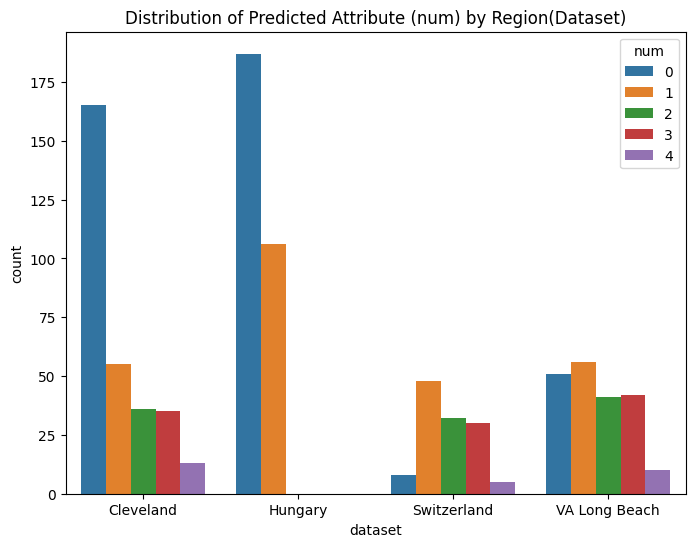

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='dataset',hue='num',data=data)
plt.title('Distribution of Predicted Attribute (num) by Region(Dataset)')
plt.show()

> Cleveland and Hungary Disparities:

  In the Cleveland dataset, there is a relatively lower count for each category of the predicted attribute ('num'). This suggests a more balanced distribution across different categories, with no predominant category.
    On the other hand, the Hungary dataset primarily consists of counts for categories 0 and 1, indicating a higher prevalence of predicting the absence of a  condition or Heart disease compared to other categories.

> Switzerland's Distribution:

In the Switzerland dataset, there is a more even distribution across categories  1, 2, and 3, suggesting variability in predicting different outcomes. Interestingly, category 4 has lower counts compared to the other categories, indicating a lesser prevalence of predicting this particular outcome.

> VA Long Beach Insights:

The VA Long Beach dataset shows noticeable counts across all categories of the predicted attribute ('num'), except for category 4, which has a relatively lower count. This suggests that the dataset contains a diverse range of predicted outcomes, with category 4 being less prevalent compared to the other categories.

# Distribution of thalassemia types varies across different regions

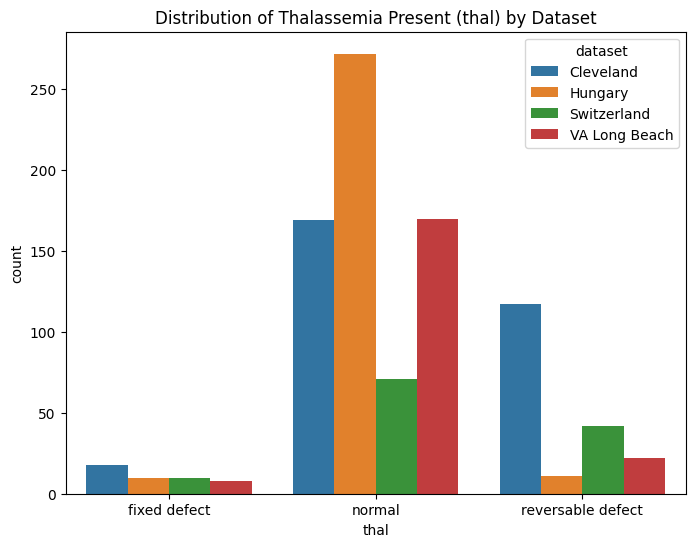

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='dataset', data=data)
plt.title('Distribution of Thalassemia Present (thal) by Dataset')
plt.show()

> The count plot reveals notable patterns in thalassemia distribution across different regions.

> Distribution of Fixed Defect:

 The count of fixed defect thalassemia across regions is relatively small, with Cleveland having the highest count, approximately around 20. This suggests that fixed defect thalassemia is less prevalent compared to other types of thalassemia in the dataset.
 
> Normal Thalassemia Distribution:

Cleveland exhibits a notably high count of normal thalassemia, with over 160 occurrences. However, other categories within the normal thalassemia type have much lower counts, typically less than 20. This indicates a significant prevalence of normal thalassemia cases in the Cleveland dataset compared to other regions.

> Reversible Defect Analysis:

Similar to the pattern observed in fixed defect thalassemia, Cleveland also demonstrates a relatively higher count of reversible defect cases compared to other regions. This suggests that reversible defect thalassemia may be more prevalent in the Cleveland dataset. 

> Regional Disparities:

The distribution of thalassemia types varies across different regions, highlighting regional disparities in the prevalence of different types of thalassemia. This could be attributed to various factors such as population demographics, healthcare practices, or data collection methodologies specific to each region.


# Distribution of restecg results varies across different regions

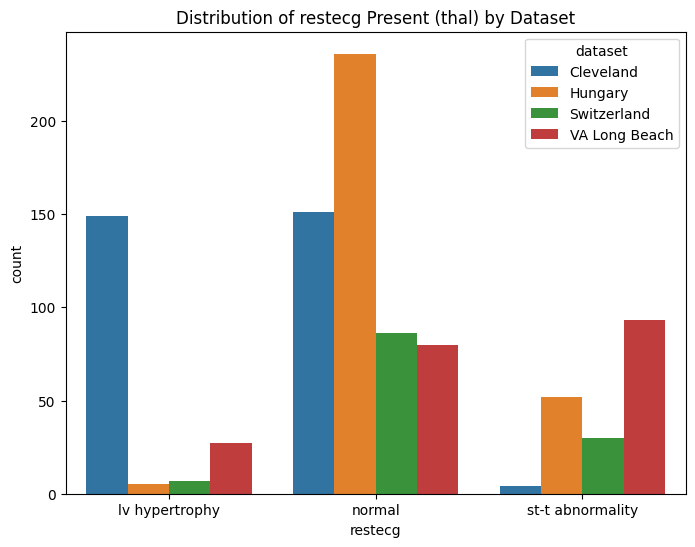

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='dataset', data=data)
plt.title('Distribution of restecg Present (thal) by Dataset')
plt.show()

In [33]:
data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

> LV Hypertrophy Category:

The Cleveland dataset shows a notably high count of LV hypertrophy cases, with approximately 150 occurrences. In contrast, other regions exhibit considerably smaller counts in this category. This suggests that LV hypertrophy cases are more prevalent in the Cleveland dataset compared to other regions.

> Normal Category:

Hungary stands out with a significantly high count of normal restecg results, with more than 200 occurrences. Following Hungary, Cleveland also demonstrates a substantial count, with around 150 occurrences in this category. However, other regions also contribute noticeably to this category, indicating a relatively widespread occurrence of normal restecg results across datasets.

> ST-T Abnormality Category:

VA Long Beach exhibits a relatively high count of ST-T abnormality cases, with approximately 100 occurrences. In comparison, other regions show fewer counts in this category. This suggests that ST-T abnormality cases may be more prevalent in the VA Long Beach dataset compared to other regions.

> Regional Variations:

The distribution of restecg results varies across different regions, indicating regional disparities in the prevalence of different types of electrocardiographic abnormalities. These disparities could stem from factors such as population characteristics, healthcare practices, or data collection methodologies specific to each region.

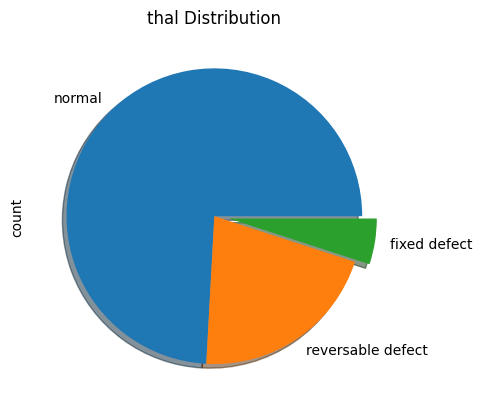

In [34]:
data['thal'].value_counts().plot(kind='pie',explode=(0,0,0.1),shadow=True)
plt.title('thal Distribution')
plt.show()

# Distribution of thalassemia types across different predicted outcomes related to heart disease

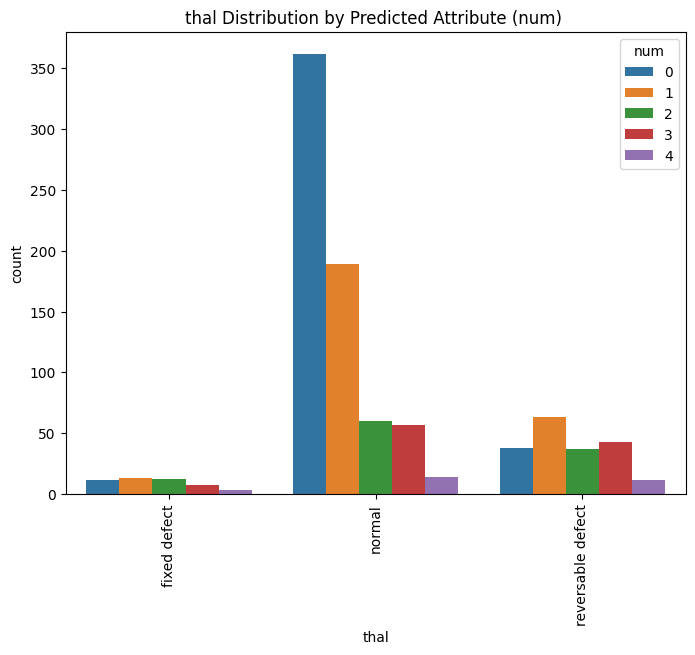

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='thal',hue='num',data=data)
plt.xticks(rotation=90)
plt.title('thal Distribution by Predicted Attribute (num) ')
plt.show()

> Fixed Defect Category:

The 'Fixed Defect' category in the 'thal' column exhibits relatively low counts across all categories of the predicted attribute 'num'. This suggests that the presence of a fixed defect in thalassemia may not be strongly associated with different predicted outcomes related to heart disease, as the counts for each category of 'num' are low, approximately around 20.

> Normal Category:

Within the 'Normal' category of thalassemia, there is a significant count of category 0 in the predicted attribute 'num'. This implies that in cases where thalassemia is classified as 'Normal', there is a high likelihood of no prediction of heart disease ('num' = 0). This finding suggests a strong association between a normal thalassemia classification and the absence of predicted heart disease.

> Reversible Defect Category:

The 'Reversible Defect' category of thalassemia shows noticeable counts across all categories of the predicted attribute 'num'. This indicates that the presence of a reversible defect in thalassemia may be associated with a range of predicted outcomes related to heart disease, as there are noticeable counts for each category of 'num'.


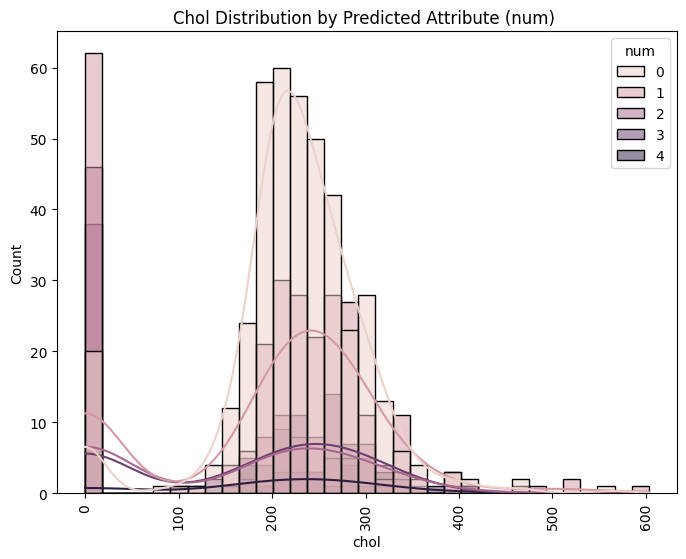

In [36]:
plt.figure(figsize=(8,6))
sns.histplot(x='chol',hue='num',data=data,kde=True)
plt.xticks(rotation=90)
plt.title('Chol Distribution by Predicted Attribute (num) ')
plt.show()

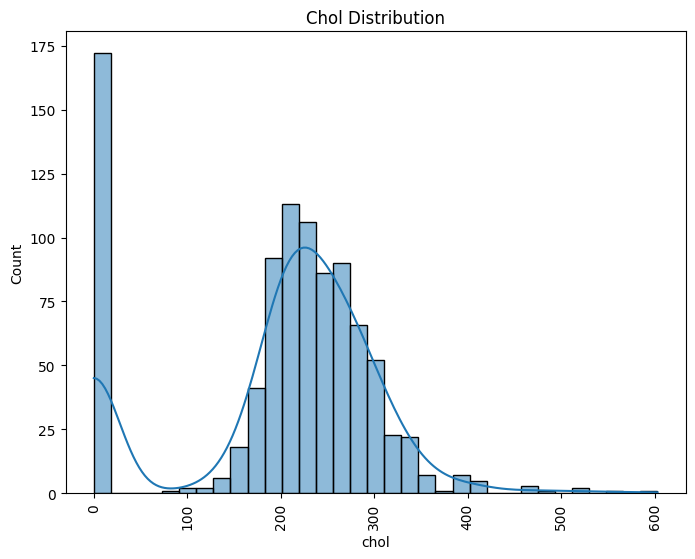

In [37]:
plt.figure(figsize=(8,6))
sns.histplot(x='chol',data=data,kde=True)
plt.xticks(rotation=90)
plt.title('Chol Distribution')
plt.show()

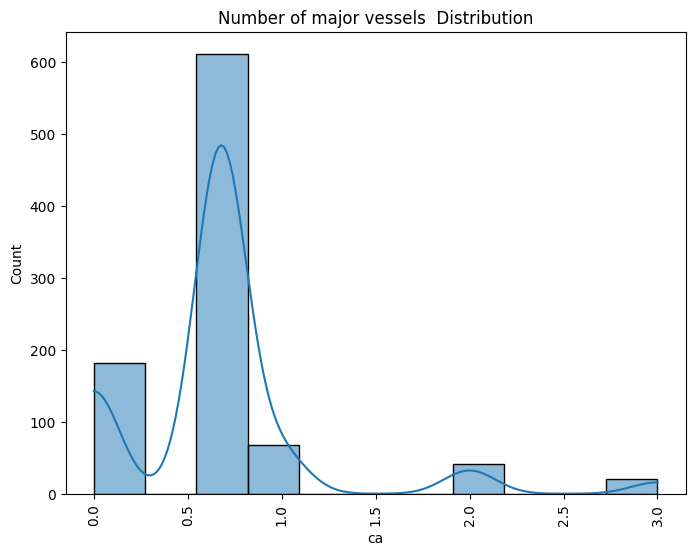

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(x='ca',data=data,kde=True)
plt.xticks(rotation=90)
plt.title('Number of major vessels  Distribution')
plt.show()

# Distribution of predicted outcomes related to heart disease across different genders

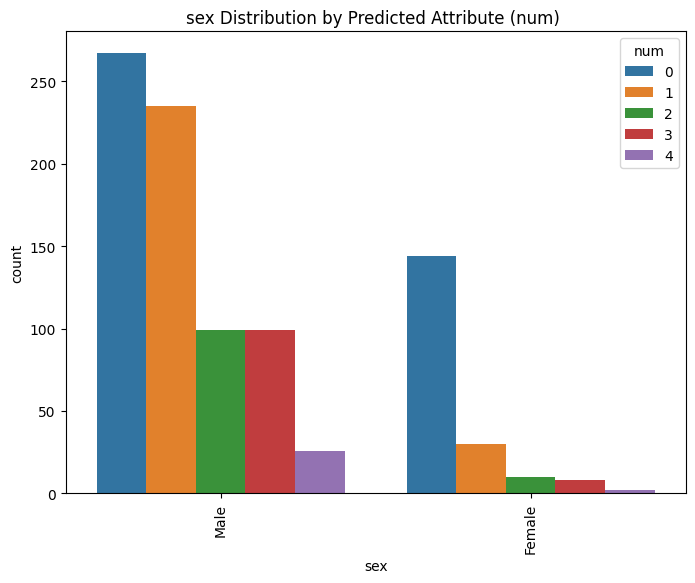

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(x='sex',hue='num',data=data)
plt.xticks(rotation=90)
plt.title('sex Distribution by Predicted Attribute (num) ')
plt.show()

> Male Distribution:

Male individuals exhibit noticeable counts across all categories of the predicted attribute 'num'. However, compared to other categories, the count for predicting the presence of heart disease (category 1, 2, 3, and 4) is relatively smaller, indicating a lower prevalence of predicted heart disease among males.

> Female Distribution:

Female individuals have lower counts across all categories of the predicted attribute 'num' compared to males. This suggests a lower overall prevalence of predicted heart disease among females in the dataset.

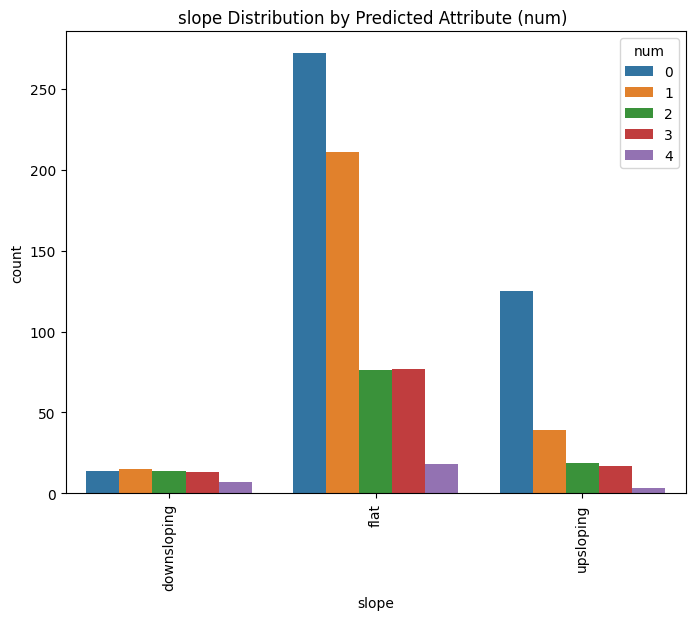

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(x='slope',hue='num',data=data)
plt.xticks(rotation=90)
plt.title('slope Distribution by Predicted Attribute (num) ')
plt.show()

> Downsloping Slope:

The downsloping slope category exhibits fewer measurements across all categories of the predicted attribute 'num'. This suggests that the downsloping slope may be less common among individuals in the dataset, regardless of the predicted outcome related to heart disease.
> Flat Slope:

The flat slope category shows noticeable counts across all categories of the predicted attribute 'num'. Particularly, category 1 has a significantly higher count, exceeding 140 measurements compared to other categories. This implies that a flat slope is prevalent among individuals, especially those predicted to have heart disease (category 1).
> Upsloping Slope:

Within the upsloping slope category, category 0 demonstrates a higher count compared to other categories. This indicates that an upsloping slope is more common among individuals predicted to have no heart disease (category 0). Additionally, category 4 exhibits fewer counts across all slope labels, suggesting a lower prevalence of predicted heart disease in this category.


# Conclusion

> Gender Disparities: There are noticeable gender disparities in the dataset, with males being more represented compared to females. While males exhibit a higher count across different categories, there are differences in the prevalence of predicted heart disease between genders, with males showing a higher count in category 4.

> Thalassemia Distribution: The distribution of thalassemia types varies across different datasets, indicating regional disparities in thalassemia prevalence. Cleveland and Hungary datasets contribute significantly to the count of normal thalassemia cases, while other categories show variability across regions.

> Electrocardiographic Results: The distribution of resting electrocardiographic results (restecg) also varies across regions, with Cleveland demonstrating a notably high count of LV hypertrophy cases and VA Long Beach exhibiting a relatively high count of ST-T abnormality cases.

> Slope Analysis: Different slope types show varying distributions across predicted outcome categories related to heart disease. The flat slope type is prevalent among individuals predicted to have heart disease, particularly in category 1.

> Predicted Attribute Analysis: Analysis of the predicted attribute 'num' reveals insights into the prevalence of different outcomes related to heart disease. Category 0 (indicating no heart disease) has a high count in certain categories such as normal thalassemia, upsloping slope, and among females.